<a href="https://colab.research.google.com/github/dell-datascience/Inage_classifier/blob/main/old_He_evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
Definition
In this script i seek to mine from MMonCa logfile the  interstitial, vacancy,
 Helium and all generated versions of thier clusters.
I resorfted to this procedure due to the restricted nature in how MMonCa 
extracts defects.
The extract command requires an upfront definition of the defect or clusters to
extract.This can be determined only after simulation is completed.
Help [report defect] command, is used to output all defects in the simulation 
for every simulation epoch.

Here i mine the HenVm, HenIm (n>1,m>1 ) from each of the 10 simulation logfiles
The ratio of He trapped in interstitial, vacancies and their clusters are
 calculated and ploted against the time simulated. 
'''
from os import listdir

import pandas as pd
import numpy as np
from os import listdir
import re
from matplotlib import text
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import seaborn as sb
%config InlineBackend.figure_format = 'retina'
def load():
  from google.colab import drive
  drive.mount('/content/drive');
  %cd '/content/drive/MyDrive/research/old_He_evolution' 
  # % ls-l
  return None

In [ ]:
#in this code i aim to extract the defect log from MMonCa logfile 
#and analyse the normalized free He atoms in simulation


def analyze(aa):
  load()
  files=list(listdir('/content/drive/MyDrive/research/old_He_evolution'))   
  #Return a list containing the names of the files in the directory
  def convert(str):
      return int("".join(re.findall("\d", str)))    #isolate the digits
  files.sort(key=convert)
  print(files)
  dic={}                    #dictionary to hold values for each run
  mydata=[]                 #list to append data
  start,end=[],[]           #get the beginning and end of the lines for each run
  trap=0 
  total_trapped=[]
  num=200                 #number of run
  a=aa                    
  pka=files[a]
  data=open(pka,'rt')     #open the logfile as readtext
  for j in range(1,num,1):  #iterator to loop through logfile based on number of runs
    data=open(pka)                            #open the log file 
    for i,line in enumerate(data):            #loop logfile
      if line.startswith('{} start'.format(j)):     #select start line number 
        start.append(i)
      if line.startswith('{} end'.format(j)):       #select end line number 
        end.append(i)

  data=open(pka,'rt')                               #open the logfile as readtext
  for line in data:                                 #iterate over each line in data 
    mydata.append(line.rstrip())                    #append line from data to list
  for i in range(1,len(start)+1):                   #iterate over each run a 
    val=mydata[start[i-1]+7:end[i-1]]               #extract the defects from logfile
    dic[i]=dic.get(i,val)                           #add values to dictionary

  for epoch in range(1,len(dic)+1,1):               #iteration number
    for idx in range(0,len(dic[epoch])):            #for each iteration 
      if (re.findall('MobileParticle/He\s',dic[epoch][idx])): #if HenVn or HenIn or HeV or Hen 
        # print(re.findall('He.+',dic[epoch][idx]))      #checkpoint      # display epoch defects stats
        size=(re.findall('\S.+/He(\d)',dic[epoch][idx]))  #take He cluster size (Hen->n)
        try: size[0]                                       #if cluster size is empty
        except:size.append(1)                              #append 1 
        count=re.findall('/He.+(......\d)',dic[epoch][idx])    #take count
        size,count=int(size[0]),int(count[0])              #convert to int
        # print(size,count)                                #checkpoint #Number of He in Hen or HeI, count 
        trap+=size*count
    total_trapped.append(trap)
    trap=0                                                #reinitialize trap to zero to prevent cumulative add
  return total_trapped                                    #return total_trapped                     

# New Section

In [ ]:
He=analyze(0)
He_1kev=analyze(1)
# KeV_1=analyze(3)
# KeV_2=analyze(2)
# KeV_5=analyze(3)
# KeV_15=analyze(4)
# KeV_20=analyze(5)
# KeV_25=analyze(6)
# KeV_30=analyze(7)
# KeV_35=analyze(8)
# KeV_40=analyze(9)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/research/old_He_evolution
['He_0.mc.log', 'He_1kev.mc.log', 'He_2kev.mc.log', 'He_5kev.mc.log', 'He_10kev.mc.log', 'He_15kev.mc.log', 'He_20kev.mc.log', 'He_25kev.mc.log', 'He_30kev.mc.log', 'He_35kev.mc.log', 'He_40kev.mc.log']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/research/old_He_evolution
['He_0.mc.log', 'He_1kev.mc.log', 'He_2kev.mc.log', 'He_5kev.mc.log', 'He_10kev.mc.log', 'He_15kev.mc.log', 'He_20kev.mc.log', 'He_25kev.mc.log', 'He_30kev.mc.log', 'He_35kev.mc.log', 'He_40kev.mc.log']


/content/drive/MyDrive/research/graphs


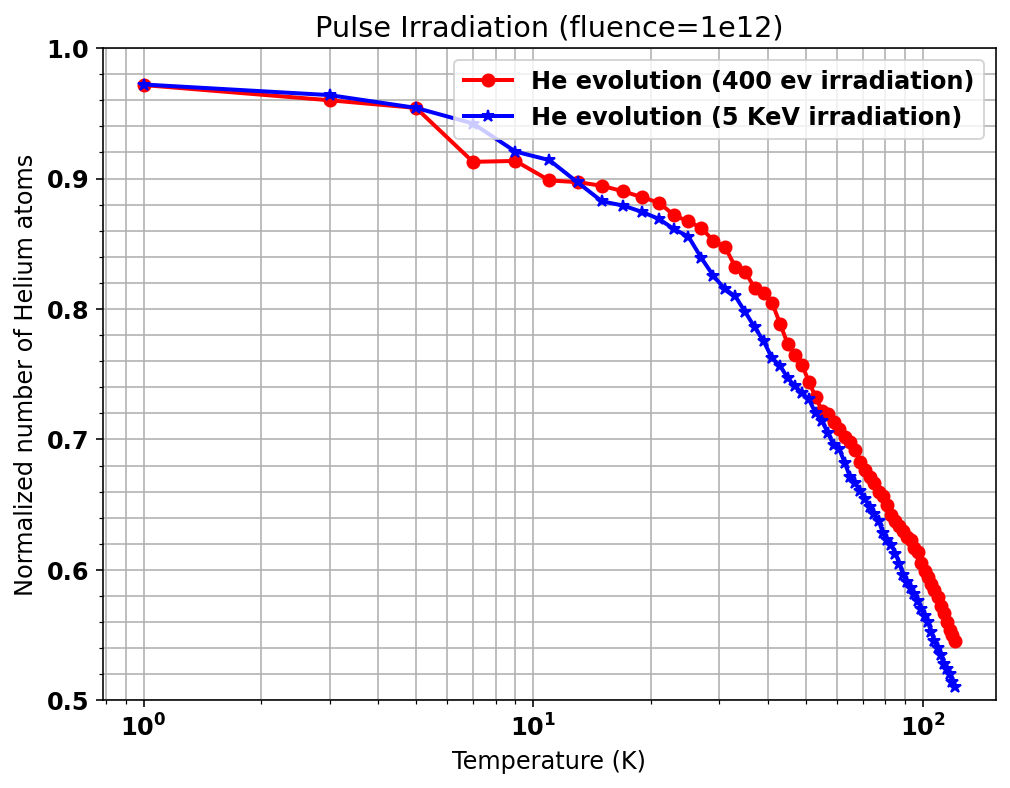

In [ ]:
%cd '/content/drive/MyDrive/research/graphs'

inserted=[x*2400 for x in np.arange(1,62)]

He=np.divide(He,inserted)
He_1kev=np.divide(He_1kev,inserted)
# r2=np.divide(trapped[1],inserted)
# r5=np.divide(trapped[2],inserted)
# r10=np.divide(trapped[3],inserted)
# r15=np.divide(trapped[4],inserted)
# r20=np.divide(trapped[5],inserted)
# r25=np.divide(trapped[6],inserted)
# r30=np.divide(trapped[7],inserted)
# r35=np.divide(trapped[8],inserted)
# r40=np.divide(trapped[9],inserted)

time=np.arange(1,122,2)
plt.rcParams.update({'font.size': 12,'font.weight':'bold'})
fig, ax =plt.subplots(figsize=(8,6))
ax.minorticks_on()
ax.set_xscale("log")
plt.ylim([0.5,1])
ax.tick_params(axis='y', which='minor', bottom=True)

ax.plot(time,He, linewidth=2, marker='o',label='He evolution (400 ev irradiation)',color='r');
ax.plot(time,He_1kev, linewidth=2, marker='*',label='He evolution (5 KeV irradiation)',color='b');
ax.grid(which='both',axis='both')
# ax.plot(time,r2, linewidth=2, label='1KeV')
# ax.plot(time,r5, linewidth=2, label='2KeV')
# ax.plot(time,r10, linewidth=2, label='10KeV')
# ax.plot(time,r15, linewidth=2, label='15KeV')
# ax.plot(time,r20, linewidth=2, label='20KeV')
# ax.plot(time,r25, linewidth=2, label='25KeV')
# ax.plot(time,r30, linewidth=2, label='30KeV')
# ax.plot(time,r35, linewidth=2, label='35KeV')
# ax.plot(time,r40, linewidth=2, label='40keV')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Normalized number of Helium atoms')
ax.set_title('Pulse Irradiation (fluence=1e12)');
ax.legend(facecolor ='white',loc='upper right',);
# plt.savefig('He_evolution_400ev_vr_5kev',dpi=2000)

In [ ]:
# 

***Stage two***

Plotting he cluster graphs

In [3]:
'''
This function is designed to plot the defects distribution at any epoch of the simulation
'''
load()
files=list(listdir('/content/drive/MyDrive/research/old_He_evolution'))
def convert(str):
    return int("".join(re.findall("\d", str)))    
files.sort(key=convert)
print(files)

def plotepoch(epoch,a):
  load()
  files=list(listdir('/content/drive/MyDrive/research/old_He_evolution'))
  def convert(str):
      return int("".join(re.findall("\d", str)))    
  files.sort(key=convert)
  files
  dic={}                    #dictionary to hold values for each run
  mydata=[]                 #list to append data
  start,end=[],[]           #get the beginning and end of the lines for each run
  trap=0 
  all_info=[]
  num=200                    #number of run
  # a=a                       #specify file 
  pka=files[a]
  data=open(pka,'rt')     #open the logfile as readtext
  for j in range(2,num+1,1):  #iterator to loop through logfile based on number of runs
    data=open(pka)                            #open the log file 
    for i,line in enumerate(data):            #loop logfile
      if line.startswith('{} start'.format(j)):     #select start line number 
        start.append(i)
      if line.startswith('{} end'.format(j)):       #select end line number 
        end.append(i)

  data=open(pka,'rt')                               #open the logfile as readtext
  for line in data:                                 #iterate over each line in data 
    mydata.append(line.rstrip())                    #append line from data to list
  for i in range(1,len(start)+1):                   #iterate over each run a 
    val=mydata[start[i-1]+7:end[i-1]]               #extract the defects from logfile
    dic[i]=dic.get(i,val)                           #add values to dictionary

  epoch=epoch
  for idx in range(0,len(dic[epoch]),1):            #for each iteration 
    if (re.findall('He',dic[epoch][idx]) ):
        # or re.findall('He[A-Z]',dic[epoch][idx]) ): #if HenVn or HenIn or HeV or Hen 
      # print(re.findall('He.+',dic[epoch][idx]))      #checkpoint      # display epoch defects stats
      size=(re.findall('\S.+/He(\d)',dic[epoch][idx]))  #take He cluster size (Hen->n)
      try: size[0]                                       #if cluster size is empty
      except:size.append(1)                              #append 1 
      count=re.findall('/He.+(......\d)',dic[epoch][idx])    #take count
      name=((dic[epoch][idx]).split('  ')[0]).split('/')[1]
      # size,count=int(size[0]),int(count[0])
      size_count_name=int(size[0]),int(count[0]),name             #convert to int
      # print(size_count_name)                               #checkpoint #Number of He in Hen or HeI, count 
      all_info.append(size_count_name)
  return all_info                   

Mounted at /content/drive
/content/drive/MyDrive/research/old_He_evolution
['He_0.mc.log', 'He_1kev.mc.log', 'He_2kev.mc.log', 'He_5kev.mc.log', 'He_10kev.mc.log', 'He_15kev.mc.log', 'He_20kev.mc.log', 'He_25kev.mc.log', 'He_30kev.mc.log', 'He_35kev.mc.log', 'He_40kev.mc.log']


In [4]:

all_info=plotepoch(48,3)                         # var1=epoch, var2=file
all_info.sort(key=lambda y: y[1],reverse=True)   # sort by defect counts
# all_info

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/research/old_He_evolution


/content/drive/MyDrive/research/graphs


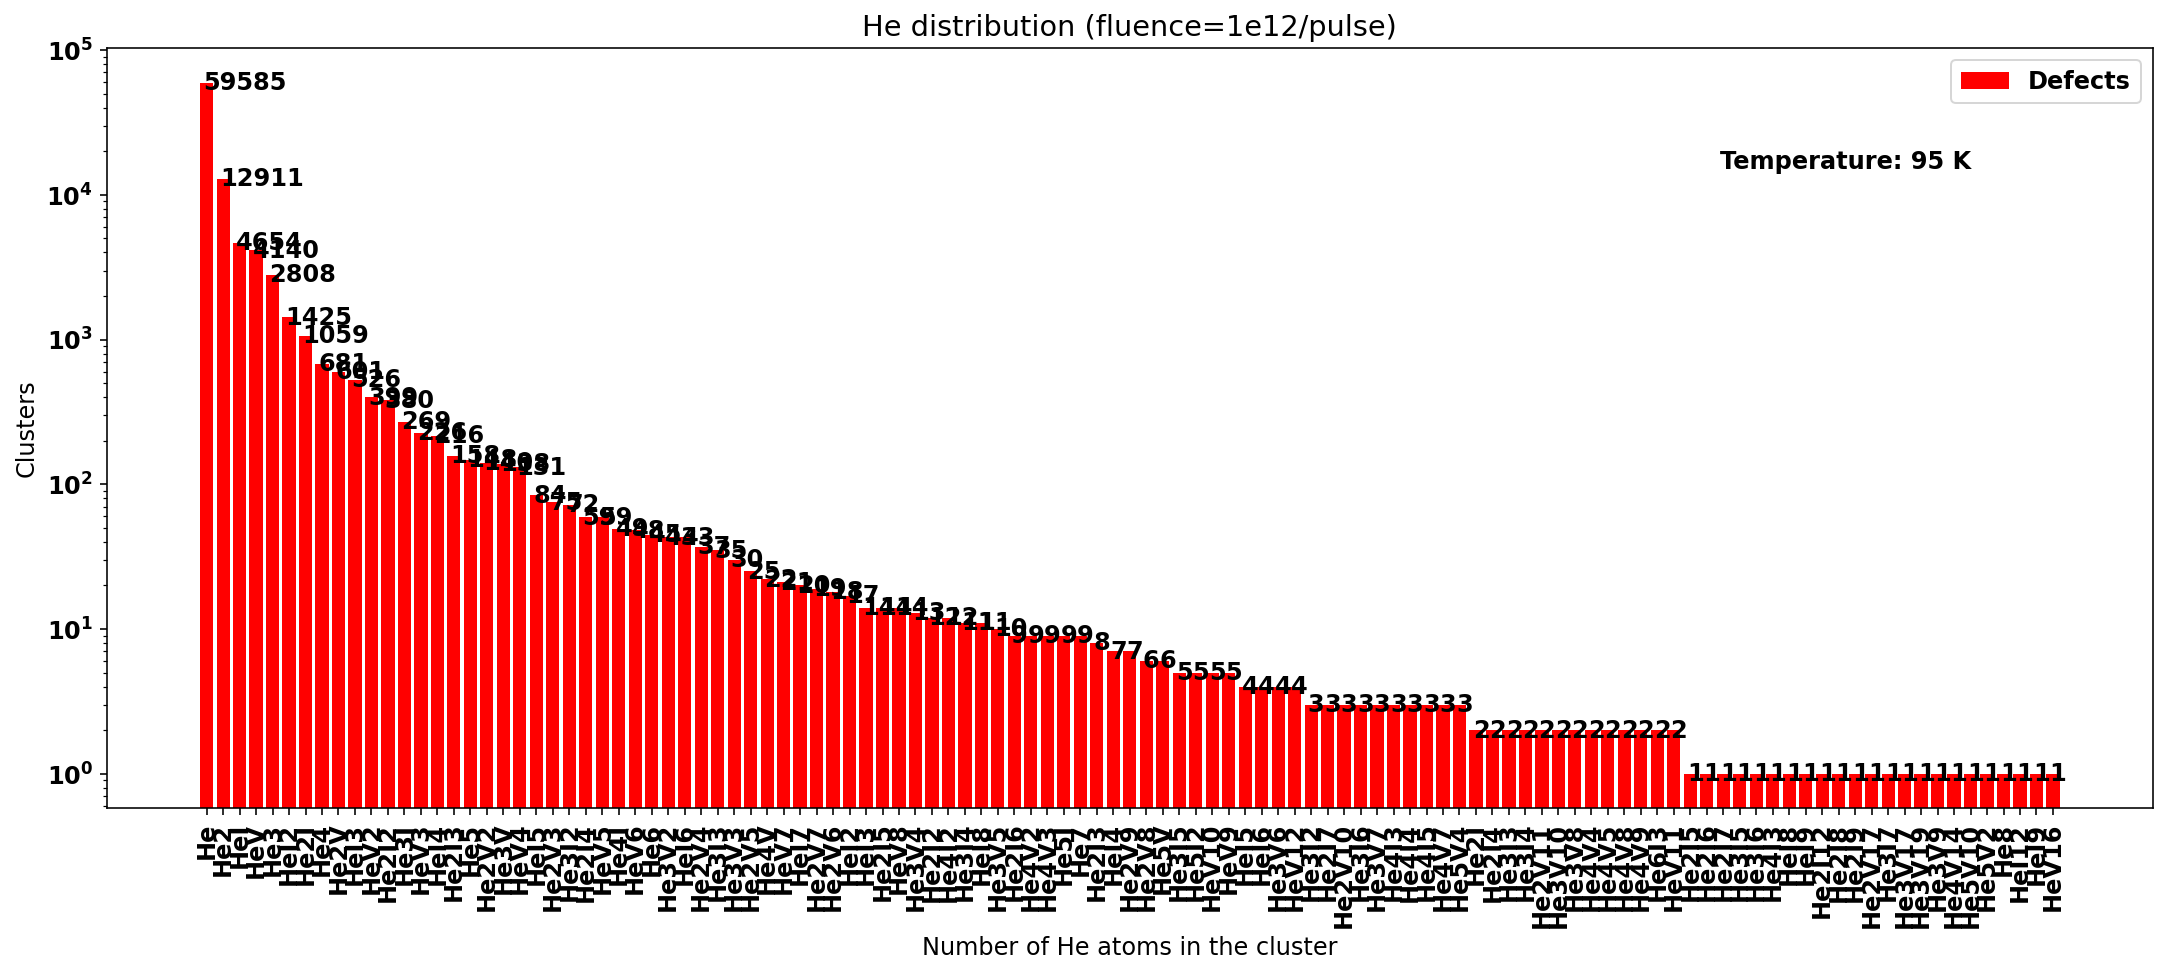

In [6]:
cluster_size=[int(x) for x,y,z in all_info]                             # list of cluster size
x=range(1,len(cluster_size)+1)                                          # get range of numbers to plot x-axis
cluster_count=[int(y) for x,y,z in all_info]                            # list of of cluster counts
cluster_name=[z for x,y,z in all_info]                                  # list of cluster names

plt.rcParams.update({'font.size': 12,'font.weight':'bold'})             # bolden scales and labels
fig, ax =plt.subplots(figsize=(15,6))                                    # define canvas size 
ax.set_yscale("log")                                                    # set y-axis to log scale to expose different scale brackets
ax.bar(x,cluster_count,color='r',label='Defects')                                       # Plot 
plt.tight_layout()
plt.xticks(rotation=90)
# ax.grid(which='Major',axis='both')                                    #show major gridlines
# set the ticks and labels
ax.set_xticks(x)                                                        # replace x_ticks with cluster names 
_ = ax.set_xticklabels(cluster_name)                                    # replace x_ticks with cluster names

for i in range(1,len(all_info)+1):                                      # display the bar values ontop of bar
  plt.text(i-0.2,all_info[i-1][1], str(all_info[i-1][1]),va='center')

ax.text(0.85, 0.85,'Temperature: 95 K', ha='center', va='center', transform=ax.transAxes)
ax.set_xlabel('Number of He atoms in the cluster');
ax.set_ylabel('Clusters');
ax.set_title('He distribution (fluence=1e12/pulse)');
ax.legend(facecolor ='white',loc='upper right');
%cd '/content/drive/MyDrive/research/graphs'
# plt.savefig('He_distribution95K_5Kev',dpi=2000,bbox_inches="tight");

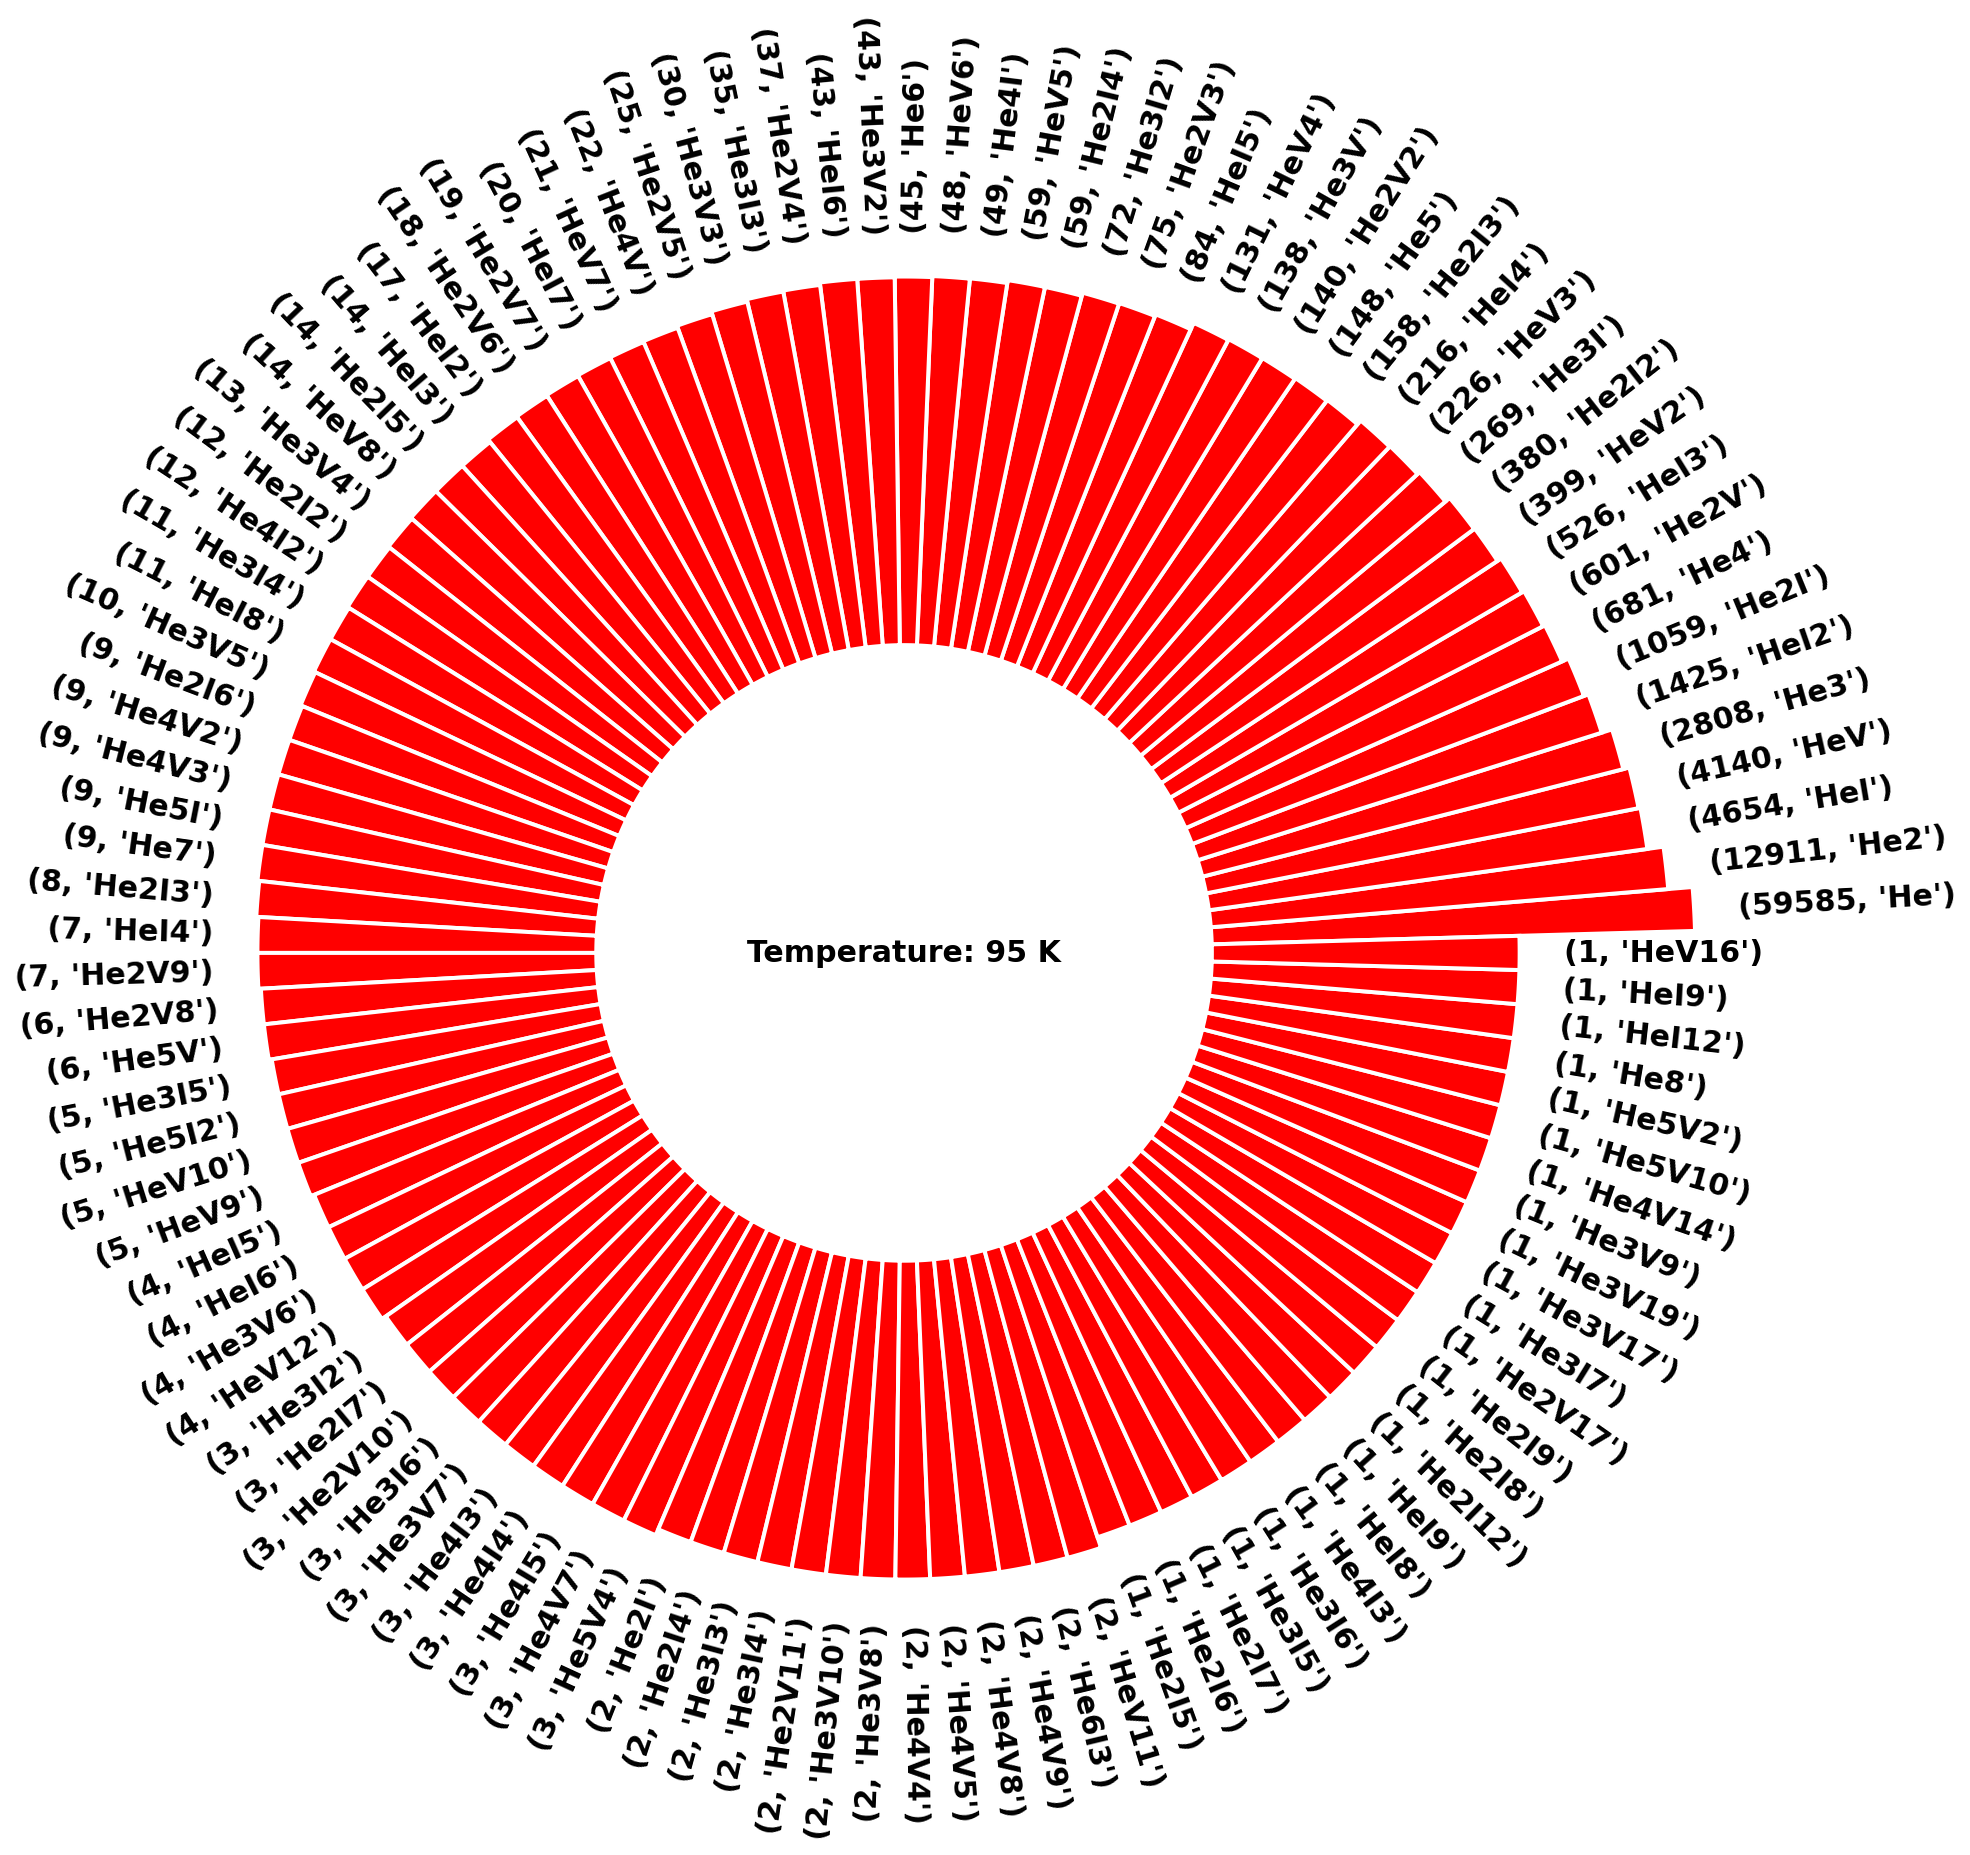

In [26]:
cluster_size=[int(x) for x,y,z in all_info]                             # list of cluster size
x=range(1,len(cluster_size)+1) 
label_cluster_count=[int(y) for x,y,z in all_info]                                         # get range of numbers to plot x-axis
cluster_count=np.log([int(y) for x,y,z in all_info])                  # list of of cluster counts
cluster_name=[z for x,y,z in all_info]  

labels=list(zip(label_cluster_count,cluster_name))
labels

# print(np.max(cluster_count))
plt.rcParams.update({'font.size': 15,'font.weight':'bold'})
plt.figure(figsize=(30,15))
ax=plt.subplot(111,polar=True)

plt.axis('off')

max=np.max(cluster_count)
min=np.min(cluster_count)+7

upperlimit=max
lowerlimit=min

slope=(max-lowerlimit)/max

height=cluster_count*slope+lowerlimit

width=2*np.pi/len(cluster_count)

indexes=list(range(1,len(cluster_count)+1))
angles=[i*width for i in indexes]

# # angles
bars = ax.bar(
    x=angles, 
    height=height, 
    width=width, 
    bottom=lowerlimit,
    linewidth=2, 
    edgecolor="white",
    color='r')

# little space between the bar and the label
labelPadding = 1
ax.text(0.5, 0.5,'Temperature: 95 K', ha='center', va='center', transform=ax.transAxes)
# Add labels
for bar, angle, height, label in zip(bars,angles, height, labels):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerlimit + bar.get_height() + labelPadding, 
        s=label,
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
# plt.savefig('He_distribution95K_5Kev',dpi=2000,bbox_inches="tight");

Object `matplotlib.text.Text` not found.


In [23]:
# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Show 3 first rows
df.head(3)

,Name,Value
0,item 1,80
1,item 2,38
2,item 3,45


In [24]:
len(df)

50

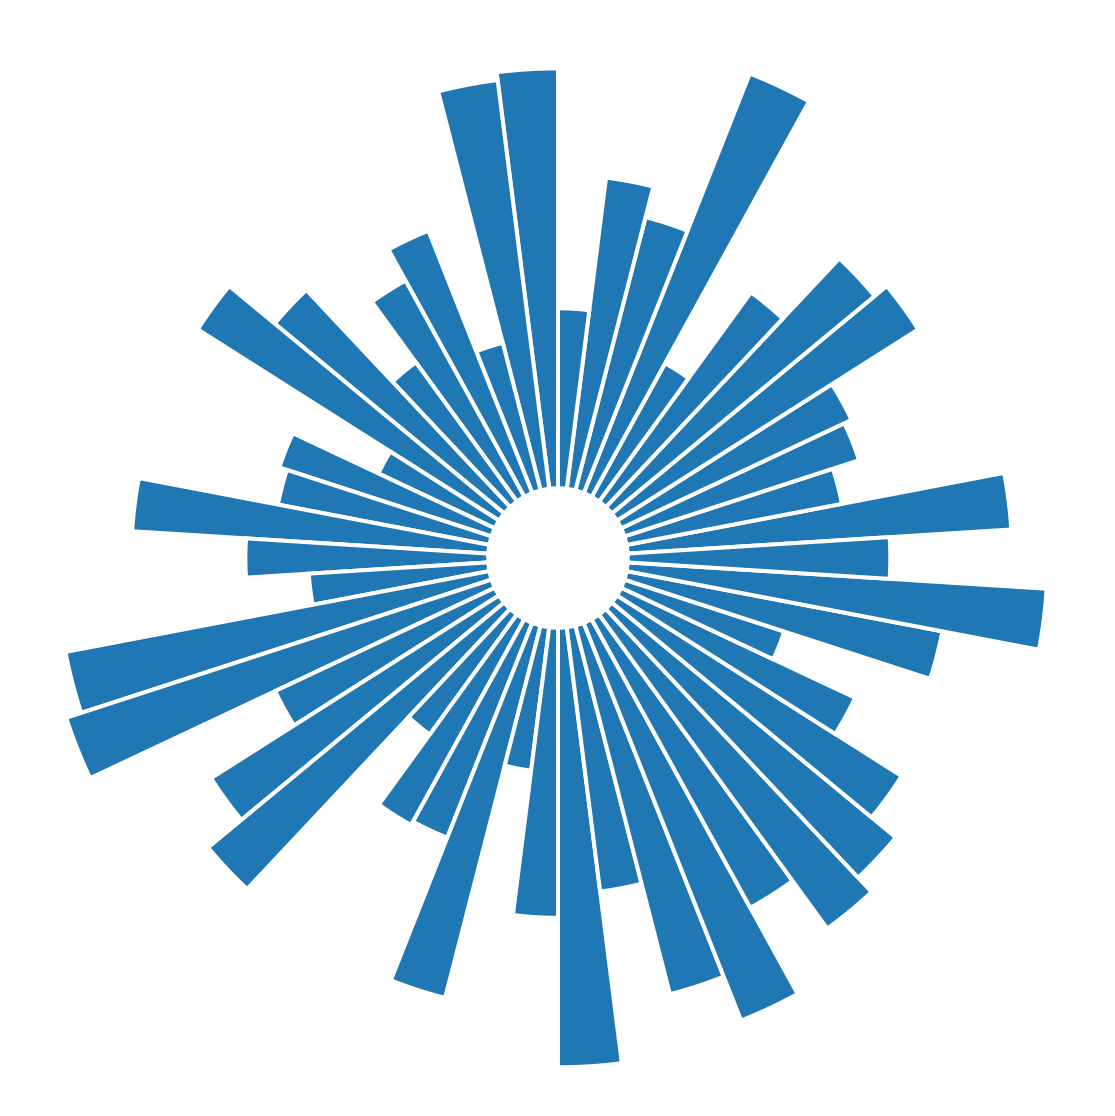

In [29]:
# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = df['Value'].max()
lowerLimit = df['Value'].min()

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit
heights
# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

In [30]:
'''
in this code i aim to extract the defect log from MMonCa logfile 
analyse:
the normalized all He atoms in simulation
normalized free atoms in simulation
normalized trapped he atoms insimulation
'''

files=list(listdir('/content/drive/MyDrive/research/old_He_evolution'))   
#Return a list containing the names of the files in the directory
def convert(str):
    return int("".join(re.findall("\d", str)))    #isolate the digits
files.sort(key=convert)
# print(files)

def analyze(aa):
  dic={}                    #dictionary to hold values for each run
  mydata=[]                 #list to append data
  start,end=[],[]           #get the beginning and end of the lines for each run
  trap=0 
  inside=0
  total_trapped=[]
  free_He=[]
  total_within=[]
  num=200                                           #number of run
  a=aa                    
  pka=files[a]
  data=open(pka,'rt')                               #open the logfile as readtext
  for j in range(1,num,1):                          #iterator to loop through logfile based on number of runs
    data=open(pka)                                  #open the log file 
    for i,line in enumerate(data):                  #loop logfile
      if line.startswith('{} start'.format(j)):     #select start line number 
        start.append(i)
      if line.startswith('{} end'.format(j)):       #select end line number 
        end.append(i)

  data=open(pka,'rt')                               #open the logfile as readtext
  for line in data:                                 #iterate over each line in data 
    mydata.append(line.rstrip())                    #append line from data to list
  for i in range(1,len(start)+1):                   #iterate over each run a 
    val=mydata[start[i-1]+7:end[i-1]]               #extract the defects from logfile
    dic[i]=dic.get(i,val)                           #add values to dictionary
  # epoch=2

  for epoch in range(1,len(dic)+1,1):                    #iteration number
    for idx in range(0,len(dic[epoch])):                     #for each iteration

    # Extract all total He remiaining in simulation box 
      if (re.findall('He',dic[epoch][idx])):                 #He is present
        # print(dic[epoch][idx])                             #checkpoint      # display epoch defects stats
        size=(re.findall('\S.+/He(\d)',dic[epoch][idx]))     #take He cluster size (Hen->n)
        try: size[0]                                         #if cluster size is empty
        except:size.append(1)                                #append 1 
        count=re.findall('/He.+(......\d)',dic[epoch][idx])  #take count
        size,count=int(size[0]),int(count[0])                #convert to int
        # print(size,count)                                  #checkpoint #Number of He in Hen or HeI, count 
        inside+=size*count
        # print(trap)
    total_within.append(inside)                              #contains the total number of He still in sim cell
    inside=0                                                 #reinitialize total He atoms in cell to prevent cumulative addition

    #Extract all free He remaining in simulation box
    for idx in range(0,len(dic[epoch])):                        #for each iteration 
      if (re.findall('MobileParticle/He\s',dic[epoch][idx])):   #if MobileParticle/He is present
        Hecount=re.findall('/He.+(......\d)',dic[epoch][idx])   #take count
        Hecount=int(count)                                      #convert to int        
        # print(Hecount)
    free_He.append(Hecount)                                   #contains the total free He atoms in the sim cell

    #extract all trapped He clusters in sim box
    for idx in range(0,len(dic[epoch])):
      if (re.findall('He(\d)',dic[epoch][idx])):
        # print(dic[epoch][idx])
        size=(re.findall('\S.+/He(\d)',dic[epoch][idx]))     #take He cluster size (Hen->n)
        try: size[0]                                         #if cluster size is empty
        except:size.append(1)                                #append 1 
        count=re.findall('/He.+(......\d)',dic[epoch][idx])  #take count
        size,count=int(size[0]),int(count[0])                #convert to int
        # print(size,count)                                  #checkpoint #Number of He in Hen or HeI, count 
        trap+=size*count
    total_trapped.append(trap)                              #contains all the trapped heliumin the sim cell
    trap=0
        

  return total_within,free_He,total_trapped                                    #return total_trapped

In [ ]:
all,free,trapped=analyze(1)

# KeV_1=analyze(3)
# KeV_2=analyze(2)
# KeV_5=analyze(3)
# KeV_15=analyze(4)
# KeV_20=analyze(5)
# KeV_25=analyze(6)
# KeV_30=analyze(7)
# KeV_35=analyze(8)
# KeV_40=analyze(9)


/content/drive/MyDrive/research/graphs


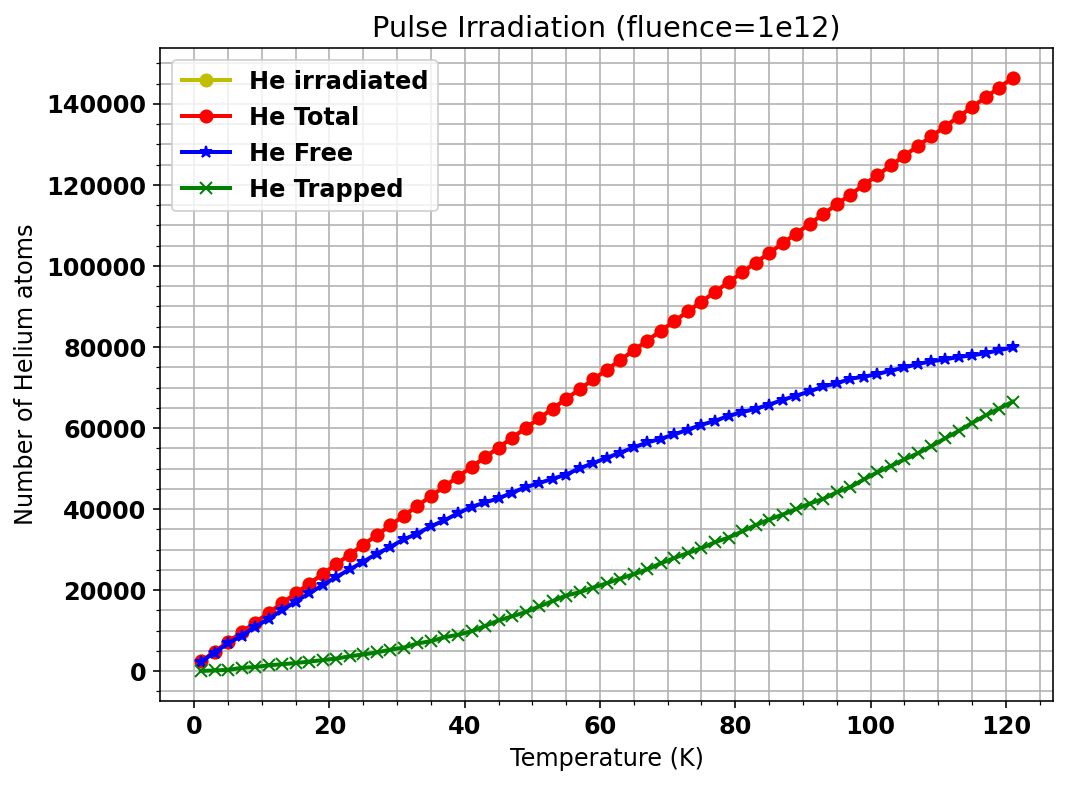

In [ ]:
%cd '/content/drive/MyDrive/research/graphs'

inserted=[x*2400 for x in np.arange(1,62)]

# all_he=np.divide(all,inserted)
all_he=all
# free_he=np.divide(free,inserted)
free_he=free
# trapped_he=np.divide(trapped,inserted)
trapped_he=trapped
                     

# r10=np.divide(trapped[3],inserted)
# r15=np.divide(trapped[4],inserted)
# r20=np.divide(trapped[5],inserted)
# r25=np.divide(trapped[6],inserted)
# r30=np.divide(trapped[7],inserted)
# r35=np.divide(trapped[8],inserted)
# r40=np.divide(trapped[9],inserted)

time=np.arange(1,122,2)
plt.rcParams.update({'font.size': 12,'font.weight':'bold'})
fig, ax =plt.subplots(figsize=(8,6))
ax.minorticks_on()
# ax.set_xscale("log")
# ax.set_yscale('log')
# plt.ylim([0.5,1])
ax.tick_params(axis='y', which='minor', bottom=True)

ax.plot(time,inserted, linewidth=2, marker='o',label='He irradiated',color='y')
ax.plot(time,all_he, linewidth=2, marker='o',label='He Total',color='r');
ax.plot(time,free_he, linewidth=2, marker='*',label='He Free',color='b');
ax.plot(time,trapped_he, linewidth=2, marker='x',label='He Trapped',color='g');

ax.grid(which='both',axis='both')
# ax.plot(time,r2, linewidth=2, label='1KeV')
# ax.plot(time,r5, linewidth=2, label='2KeV')
# ax.plot(time,r10, linewidth=2, label='10KeV')
# ax.plot(time,r15, linewidth=2, label='15KeV')
# ax.plot(time,r20, linewidth=2, label='20KeV')
# ax.plot(time,r25, linewidth=2, label='25KeV')
# ax.plot(time,r30, linewidth=2, label='30KeV')
# ax.plot(time,r35, linewidth=2, label='35KeV')
# ax.plot(time,r40, linewidth=2, label='40keV')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Number of Helium atoms')
ax.set_title('Pulse Irradiation (fluence=1e12)');
ax.legend(facecolor ='white',loc='upper left',);
plt.savefig('He_evolution_breakdownno_log',dpi=2000)